## Project steps

* Problem definition
* Data
* Evaluation 
* Features
* Modelling 
* Experimentations

## Problem definition

* This project is a supervised learning, classification problem with multiple classes.
* In this project, we will compare and contrast the performance of three different learning models 

## Data

The Dataset is collected from the UCI Machine Learning Repository and alternatively from kaggle. \
link : https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data \
link : https://www.kaggle.com/arshid/iris-flower-dataset\
We will be using the iris flowers dataset, which contains 150 observations of iris flowers. There are four columns of measurements and the species of flower observed. Only three species are present in this dataset.


## Evaluation 

we will pursue the model if we reach the accuracy of 95%

## Features

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica


## Preparing the necessary tools

we are going to use pandas, numpy , matplotlib, scipy, sklearn

In [7]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from pandas.plotting import scatter_matrix

# Import the sklearn models

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# import the tools for training and testing
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# import the tools for evaluating

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import recall_score,precision_score,f1_score, accuracy_score



In [8]:
# import the dataset

df = pd.read_csv('iris-flower-dataset/IRIS.csv')

In [10]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Data Exploration

In [11]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [30]:
df.sepal_length.max()

7.9

In [12]:
df.shape

(150, 5)

In [13]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
df.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [15]:
df['species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: species, dtype: int64

In [16]:
# check missing values
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [18]:
# check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


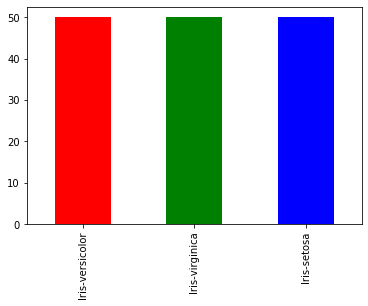

In [20]:
# plot the species column
df['species'].value_counts().plot(kind = 'bar', color = ['red','green','blue']);

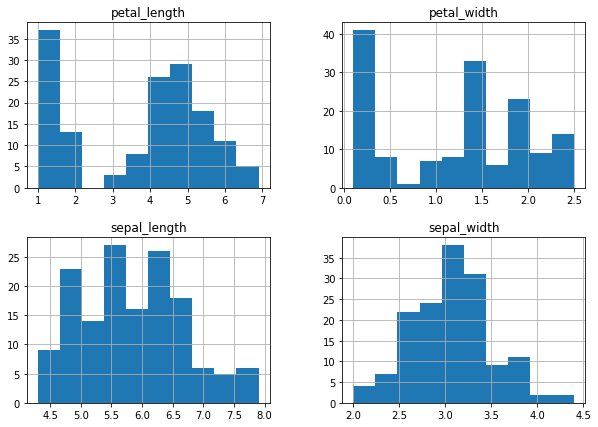

In [25]:
## Data visualizations
df.hist(figsize = (10,7));

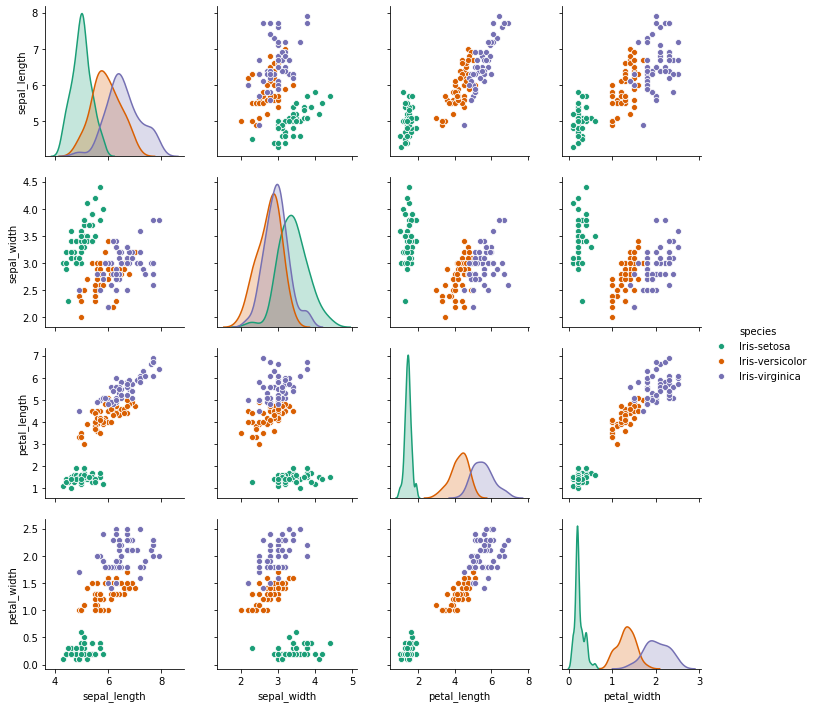

In [91]:
# Statistical graphs of datasets

import seaborn as sns

sns.pairplot(df,hue = 'species',palette = 'Dark2');

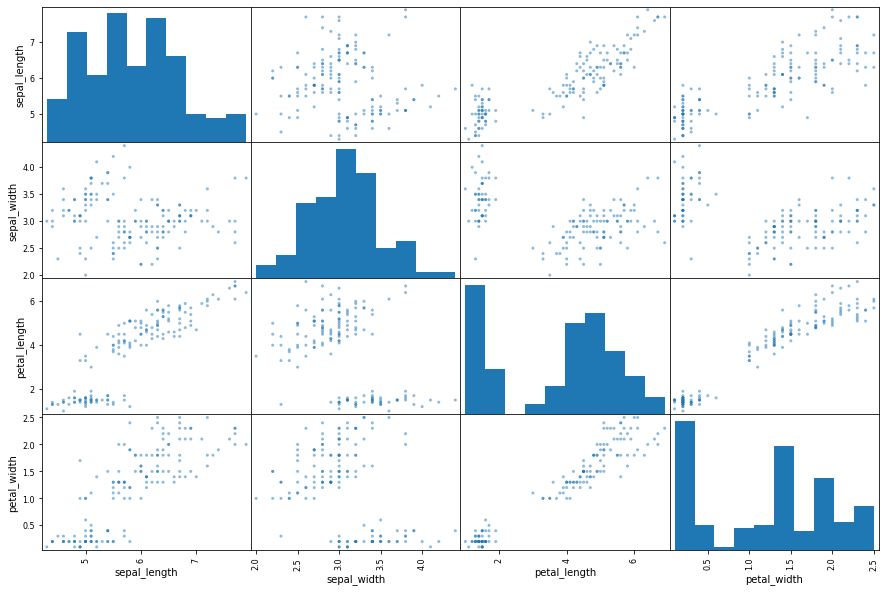

In [90]:
# Scatter plot matrix

scatter_matrix(df, figsize = (15,10));

In [34]:
# Create validation dataset
X = df.drop('species', axis = 1)
y = df['species']

In [190]:
# Split the dataset into training and testing set
np.random.seed(7)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [191]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [192]:
# we use four models for our data

# create a dictionary of models

models = {'LogisticRegression': LogisticRegression(),
         'KNeighborsClassifier': KNeighborsClassifier(),
         'SVC':SVC(),
         'RandomForestClassifier': RandomForestClassifier()}

def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    MOdels is used for evaluation and training
    
    """
    np.random.seed(7)
    model_results = {}
    # create an empty dictionary for models results
    
    for model_name,model in models.items():
        
        # Fitting of models on data
        model.fit(X_train,y_train)
        
        # evaluate the models score
        model_results[model_name] = model.score(X_test,y_test)
        
    return model_results
    
    

In [193]:
model_results = fit_and_score(models = models,
              X_train = X_train,
              X_test = X_test,
              y_train = y_train,
              y_test = y_test);

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [194]:
model_results

{'LogisticRegression': 0.8,
 'KNeighborsClassifier': 0.9,
 'SVC': 0.9333333333333333,
 'RandomForestClassifier': 0.8666666666666667}

In [195]:
# Models comparison

model_compare = pd.DataFrame(model_results, index = ['accuracy'])

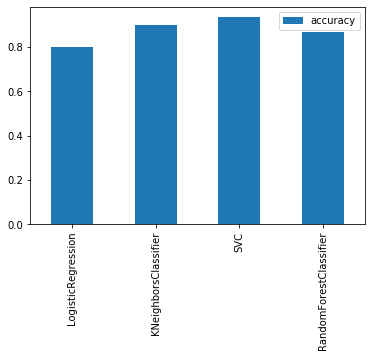

In [196]:
model_compare.T.plot.bar();

In [197]:
# so we hypertune the Svc as it performs better

# hyperparameter tuning with the randomized searchcv

svc_grid = param_grid = {'C': [0.1,1, 10, 100], 
                         'gamma': [1,0.1,0.01,0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']}

# use Randomizedsearchcv

grid = RandomizedSearchCV(SVC(probability  = True),
                     param_distributions= svc_grid,
                    cv = 5,
                    n_jobs=20,
                    verbose=5,
                    
                    )

grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  11 out of  50 | elapsed:    0.0s remaining:    0.4s
[Parallel(n_jobs=20)]: Done  22 out of  50 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=20)]: Done  33 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  44 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  50 out of  50 | elapsed:    0.1s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                 coef0=0.0, decision_function_shape='ovr',
                                 degree=3, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, probability=True,
                                 random_state=None, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='warn', n_iter=10, n_jobs=20,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['rbf', 'poly', 'sigmoid']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=5)

In [198]:
grid.best_params_

{'kernel': 'rbf', 'gamma': 0.01, 'C': 10}

In [199]:
grid.score(X_test,y_test)

0.9

In [200]:
# classification reports

y_preds = grid.predict(X_test)

## Classification reports without cross validation

In [205]:
print(classification_report(y_test,y_preds))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.91      0.83      0.87        12
 Iris-virginica       0.83      0.91      0.87        11

       accuracy                           0.90        30
      macro avg       0.91      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



In [226]:
# Create new classifier with best parameters

clf = SVC(kernel ='rbf', gamma =  0.01, C =  10)
# Cross validation accuracy

cv_acc = cross_val_score(clf, X,y, scoring = 'accuracy',cv = 10)
cv_acc

array([1.        , 0.93333333, 1.        , 1.        , 1.        ,
       0.93333333, 0.93333333, 1.        , 1.        , 1.        ])

In [227]:
cv_acc.mean()

0.9800000000000001

In [228]:
# Confusion matrix

confusion_matrix(y_test,y_preds)

array([[ 7,  0,  0],
       [ 0, 10,  2],
       [ 0,  1, 10]], dtype=int64)

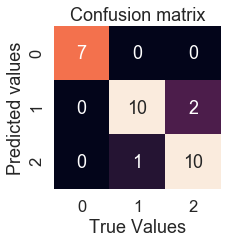

In [229]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test,y_preds):
    fig,ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                     annot = True,
                     cbar = False)
    plt.title('Confusion matrix')
    plt.xlabel('True Values')
    plt.ylabel('Predicted values')
    
plot_conf_mat(y_test,y_preds)